In [1]:
# 导入相关包
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.0.0-beta1
2.2.4-tf


In [21]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_all,y_train_all),(X_test,y_test) = fashion_mnist.load_data()

# 对数据进行正则化
# X_train_all = X_train_all / 255.0
# X_test = X_test / 255.0

# 将训练集分为验证集和训练集
X_vaild,X_train = X_train_all[:5000],X_train_all[5000:]
y_vaild,y_train = y_train_all[:5000],y_train_all[5000:]

print(X_vaild.shape,y_vaild.shape)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

# 数据归一化
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
X_vaild = standardScaler.transform(X_vaild.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
X_test = standardScaler.transform(X_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


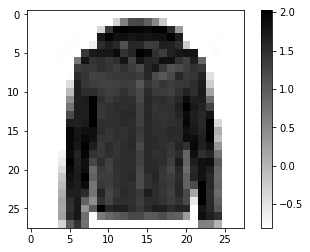

In [22]:
# 展示一下这个数据集的图像
def show_single_image(img_arr):
    plt.imshow(img_arr,cmap="binary")
    plt.colorbar()
    plt.show()
show_single_image(X_train[0]) #这不能输入二维数组，arr[:1] 和 arr[0] 还是不一样的

'\n0\tT-shirt/top（T恤）\n1\tTrouser（裤子）\n2\tPullover（套衫）\n3\tDress（裙子）\n4\tCoat（外套）\n5\tSandal（凉鞋）\n6\tShirt（汗衫）\n7\tSneaker（运动鞋）\n8\tBag（包）\n9\tAnkle boot（踝靴）\n'

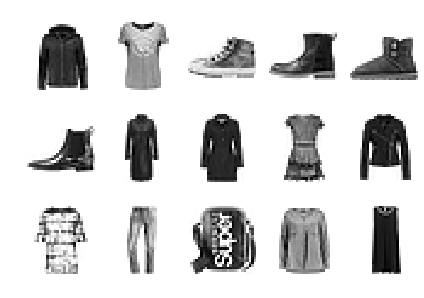

In [23]:
def show_images(n_rows, n_cols, X_data, y_data, class_names):
    assert len(X_data) == len(y_data)
    assert n_rows * n_cols < len(X_data)
    plt.figure(figsize=(n_cols*1.4,n_rows*1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows,n_cols,index+1)
            plt.imshow(X_data[index],cmap="binary",interpolation="nearest")
            plt.axis('off')
            plt.title(class_names[y_data[index]],color='white')
    plt.show()
   
'''
0	T-shirt/top（T恤）
1	Trouser（裤子）
2	Pullover（套衫）
3	Dress（裙子）
4	Coat（外套）
5	Sandal（凉鞋）
6	Shirt（汗衫）
7	Sneaker（运动鞋）
8	Bag（包）
9	Ankle boot（踝靴）
'''
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
show_images(3,5,X_train,y_train,class_names)

In [24]:
# 创建Sequential 模型
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28])) # 这是输入层 28*28图像将它展平为一维向量
model.add(keras.layers.Dense(300, activation='relu')) # 加入一个全连接层，神经元层数300
model.add(keras.layers.Dense(100, activation='relu')) # 加入一个全连接层，神经元层数100
model.add(keras.layers.Dense(10,activation = "softmax")) # 加入一个softmax隐层

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=['accuracy']) # 定义损失函数,优化方法为随机梯度下降法：sgd

In [6]:
model.layers #模型有四层

In [25]:
model.summary()
# [n, 784] * W + b --> [n, 300] W.shape:[784,300] , b:[300]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [26]:
# 开始进行训练构建出模型
history = model.fit(X_train,y_train,epochs=10,
             validation_data=(X_vaild,y_vaild))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 71us/sample - loss: 0.5409 - accuracy: 0.8094 - val_loss: 0.4125 - val_accuracy: 0.8566
Epoch 2/10
55000/55000 [==============================] - 4s 65us/sample - loss: 0.3936 - accuracy: 0.8581 - val_loss: 0.3732 - val_accuracy: 0.8660
Epoch 3/10
55000/55000 [==============================] - 4s 69us/sample - loss: 0.3558 - accuracy: 0.8715 - val_loss: 0.3553 - val_accuracy: 0.8738
Epoch 4/10
55000/55000 [==============================] - 4s 69us/sample - loss: 0.3294 - accuracy: 0.8812 - val_loss: 0.3403 - val_accuracy: 0.8768
Epoch 5/10
55000/55000 [==============================] - 4s 82us/sample - loss: 0.3097 - accuracy: 0.8868 - val_loss: 0.3287 - val_accuracy: 0.8810
Epoch 6/10
55000/55000 [==============================] - 4s 64us/sample - loss: 0.2943 - accuracy: 0.8936 - val_loss: 0.3279 - val_accuracy: 0.8844
Epoch 7/10
55000/55000 [==============================] -

In [9]:
type(history)

tensorflow.python.keras.callbacks.History

In [10]:
history.history

{'loss': [0.7169984708612616,
  0.49041911420388656,
  0.44480114137042653,
  0.4169431912162087,
  0.39709235656478187,
  0.3802312399994243,
  0.36647389170039785,
  0.35479528613524003,
  0.34394682047150354,
  0.3347923965237357],
 'accuracy': [0.7632727,
  0.8292909,
  0.8459091,
  0.8540364,
  0.86007273,
  0.8644364,
  0.86956364,
  0.87405455,
  0.87716365,
  0.8793455],
 'val_loss': [0.5140574693679809,
  0.45322980093955995,
  0.4483953772544861,
  0.4196918042182922,
  0.3895295237183571,
  0.3728812325000763,
  0.36806177010536195,
  0.36555276222229005,
  0.3535600294709206,
  0.3415901857852936],
 'val_accuracy': [0.8258,
  0.847,
  0.8442,
  0.8592,
  0.8622,
  0.8712,
  0.871,
  0.864,
  0.8746,
  0.8802]}

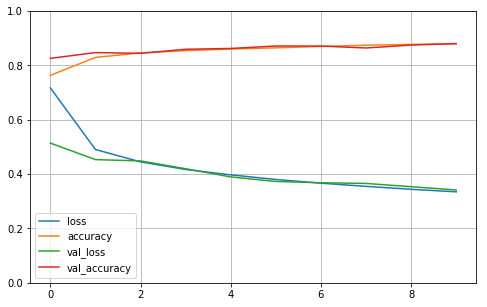

In [11]:
def plt_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plt_learning_curves(history)

In [12]:
test_loss, test_acc = model.evaluate(X_test,y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.3763 - accuracy: 0.8668
Test accuracy: 0.8668
